<a href="https://colab.research.google.com/github/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/blob/master/deeplearning/Keras_PimaDiabetes_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras - Prenvendo a ocorrência de Diabetes

In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)

# Lendo um dataset do Github

In [2]:
file = 'https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/pima-indians-diabetes.csv'

In [3]:
atributos =  ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df = pd.read_csv(file, header=None, names = atributos)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df[atributos[:-1]].values
X[:3]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ]])

In [5]:
y = df.outcome.values
y[:3]

array([1, 0, 1])

# Modelo

In [6]:
# Modelo em keras 
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

In [7]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%time
# Fit the model
history = model.fit(X, y, epochs=300, batch_size=128, verbose=1)

Epoch 1/300
6/6 [==============================] - 2s 3ms/step - loss: 4.1295 - accuracy: 0.5195
Epoch 2/300
6/6 [==============================] - 0s 2ms/step - loss: 1.8994 - accuracy: 0.4388
Epoch 3/300
6/6 [==============================] - 0s 2ms/step - loss: 1.2736 - accuracy: 0.5104
Epoch 4/300
6/6 [==============================] - 0s 2ms/step - loss: 0.8600 - accuracy: 0.6315
Epoch 5/300
6/6 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.6510
Epoch 6/300
6/6 [==============================] - 0s 2ms/step - loss: 0.7948 - accuracy: 0.6393
Epoch 7/300
6/6 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.6523
Epoch 8/300
6/6 [==============================] - 0s 2ms/step - loss: 0.7557 - accuracy: 0.6250
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.6654
Epoch 10/300
6/6 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6562
Epoch 11/300
6/6 [===========

In [12]:
# evaluate the model
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7891

accuracy: 78.91%


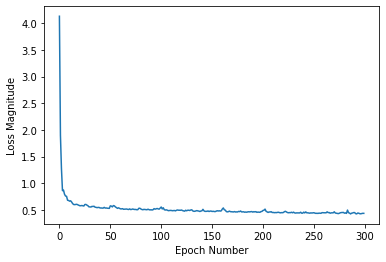

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

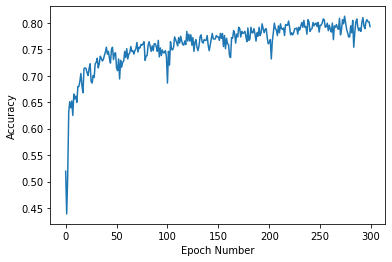

In [14]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'])